## <font color=RoyalBlue size=5>Curso Machine Learning n Data Science de A à Z</font>

***

#### <font color=CornflowerBlue size=4>Seçao 20 - Agrupamento KMeans</font>

***

#### <font color=CornflowerBlue size=3>Arquivo UCI - Risco de crédito</font>

***

In [1]:
## Importando bibliotecas

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
## Importando a base de dados

base = pd.read_csv('credit_card_clients.csv', header = 1) ## header = 1 para tirar a primeira linha x1, x2, x3, etc.

In [5]:
## Somando as colunas 'bill' de cada mes para somar o valor total que o cliente estava devendo

base['BILL_TOTAL'] = base['BILL_AMT1'] + base['BILL_AMT2'] + base['BILL_AMT3'] + base['BILL_AMT4'] + base['BILL_AMT5'] + base['BILL_AMT6']

In [9]:
## Selecionando os atributos
## 1 e 25 são os atributos 'limit_bal' e 'bill_total'
## .values == padrao do numpy

X = base.iloc[:, [1,25]].values
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [13]:
## Encontrando a quantidade de clusters
## elbow method

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(X) ## treinamento
    wcss.append(kmeans.inertia_)
    
wcss

[60000.0,
 35197.73925382836,
 20128.14098757631,
 14943.389077745102,
 10707.842075549495,
 8603.473181334297,
 7397.980104443422,
 6351.888604089764,
 5664.878200466927,
 5049.550278457274]

Text(0, 0.5, 'WCSS')

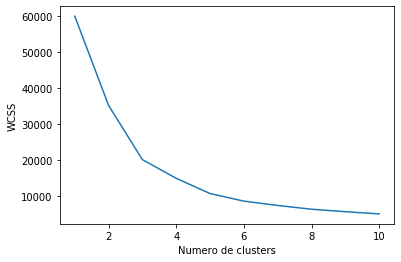

In [14]:
## Plotando
## elbow method

plt.plot(range(1,11), wcss)
plt.xlabel('Numero de clusters')
plt.ylabel('WCSS')

In [17]:
## Uma vez que a quantidae de clusters foram encontradas, é necessario treinar o modelo

kmeans = KMeans(n_clusters = 4, random_state = 0)
previsoes = kmeans.fit_predict(X)

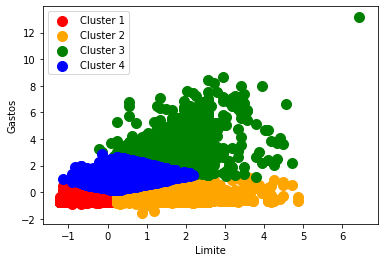

In [20]:
## Plotando

## Somente as linhas que fazem parte do cluster 0 e somente a posicao X, ou seja, posicao 0 e assim por diante
## No outro eixo, novamente, somente os clusters de posicao 0, porém, a coluna de numero 1 (na pratica, coluna 2)
## s == tamanho das bolinhas

plt.scatter(X[previsoes == 0, 0], X[previsoes == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[previsoes == 1, 0], X[previsoes == 1, 1], s = 100, c = 'orange', label = 'Cluster 2')
plt.scatter(X[previsoes == 2, 0], X[previsoes == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[previsoes == 3, 0], X[previsoes == 3, 1], s = 100, c = 'blue', label = 'Cluster 4')
plt.xlabel('Limite')
plt.ylabel('Gastos')
plt.legend()

In [24]:
colunas = ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'BILL_TOTAL', 'KMEANS']

In [25]:
## Visualizar quem sao as "pessoas" dentro deste grupo

import numpy as np

lista_clientes = np.column_stack((base, previsoes))
lista_clientes = pd.DataFrame(lista_clientes, columns = colunas)
lista_clientes

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,BILL_TOTAL,KMEANS
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,689,0,0,0,0,1,7704,0
1,2,120000,2,2,2,26,-1,2,0,0,...,3261,0,1000,1000,1000,0,2000,1,17077,0
2,3,90000,2,2,2,34,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,101653,0
3,4,50000,2,2,1,37,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,231334,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,19131,2000,36681,10000,9000,689,679,0,109339,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,15980,8500,20000,5003,3047,5000,1000,0,725349,3
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,0,1837,3526,8998,129,0,0,0,21182,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,19357,0,0,22000,4200,2000,3100,1,70496,0
29998,29999,80000,1,3,1,41,1,-1,0,0,...,48944,85900,3409,1178,1926,52964,1804,1,266611,0


In [31]:
lista_clientes.groupby('KMEANS').count()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,BILL_TOTAL
KMEANS,,,,,,,,,,,,,,,,,,,,,
0,16350,16350,16350,16350,16350,16350,16350,16350,16350,16350,...,16350,16350,16350,16350,16350,16350,16350,16350,16350,16350
1,7956,7956,7956,7956,7956,7956,7956,7956,7956,7956,...,7956,7956,7956,7956,7956,7956,7956,7956,7956,7956
2,1293,1293,1293,1293,1293,1293,1293,1293,1293,1293,...,1293,1293,1293,1293,1293,1293,1293,1293,1293,1293
3,4401,4401,4401,4401,4401,4401,4401,4401,4401,4401,...,4401,4401,4401,4401,4401,4401,4401,4401,4401,4401


#### <font color=CornflowerBlue size=4>Agrupamento com mais de duas dimensoes/atributos</font>

***

Text(0, 0.5, 'WCSS')

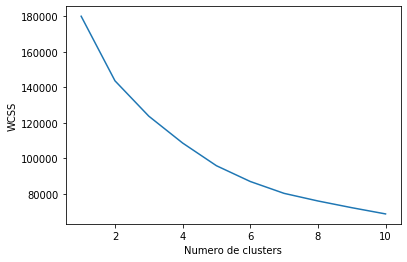

In [34]:
## Importando bibliotecas

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Importando a base de dados

base = pd.read_csv('credit_card_clients.csv', header = 1) ## header = 1 para tirar a primeira linha x1, x2, x3, etc.

## Somando as colunas 'bill' de cada mes para somar o valor total que o cliente estava devendo

base['BILL_TOTAL'] = base['BILL_AMT1'] + base['BILL_AMT2'] + base['BILL_AMT3'] + base['BILL_AMT4'] + base['BILL_AMT5'] + base['BILL_AMT6']

## Selecionando os atributos
## 1 e 25 são os atributos 'limit_bal' e 'bill_total'
## .values == padrao do numpy

X = base.iloc[:, [1, 2, 3, 4, 5, 25]].values
scaler = StandardScaler()
X = scaler.fit_transform(X)

## Encontrando a quantidade de clusters

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(X) ## treinamento
    wcss.append(kmeans.inertia_)
    
## Plotando    
## elbow method

plt.plot(range(1,11), wcss)
plt.xlabel('Numero de clusters')
plt.ylabel('WCSS')

In [35]:
## Treinando o modelo
kmeans = KMeans(n_clusters = 4, random_state = 0)
previsoes = kmeans.fit_predict(X)

In [41]:
import numpy as np

lista_clientes = np.column_stack((base, previsoes))
lista_clientes = lista_clientes[lista_clientes[:,26].argsort()]

lista_clientes = pd.DataFrame(lista_clientes)
lista_clientes.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,27286,280000,1,1,2,32,0,0,0,0,...,177920,10050,10123,10001,6244,6315,7037,0,1163065,0
1,26323,360000,2,1,2,36,0,0,0,0,...,315782,11000,13000,11019,23000,13300,3,0,1856026,0
2,14939,310000,2,2,2,35,0,0,0,0,...,115785,6225,5808,4312,4427,4524,4263,0,934794,0
3,5438,240000,2,1,2,33,-1,0,0,0,...,167230,7000,8000,7000,6000,8000,7000,0,961249,0
4,24031,260000,1,1,2,26,0,0,0,0,...,187233,7065,7054,6500,7000,7001,10000,0,1187107,0
